In [1]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [2]:
class(AirPassengers)
start(AirPassengers)
end(AirPassengers)

[1] "ts"

[1] 1949    1

[1] 1960   12

In [3]:
summary(AirPassengers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

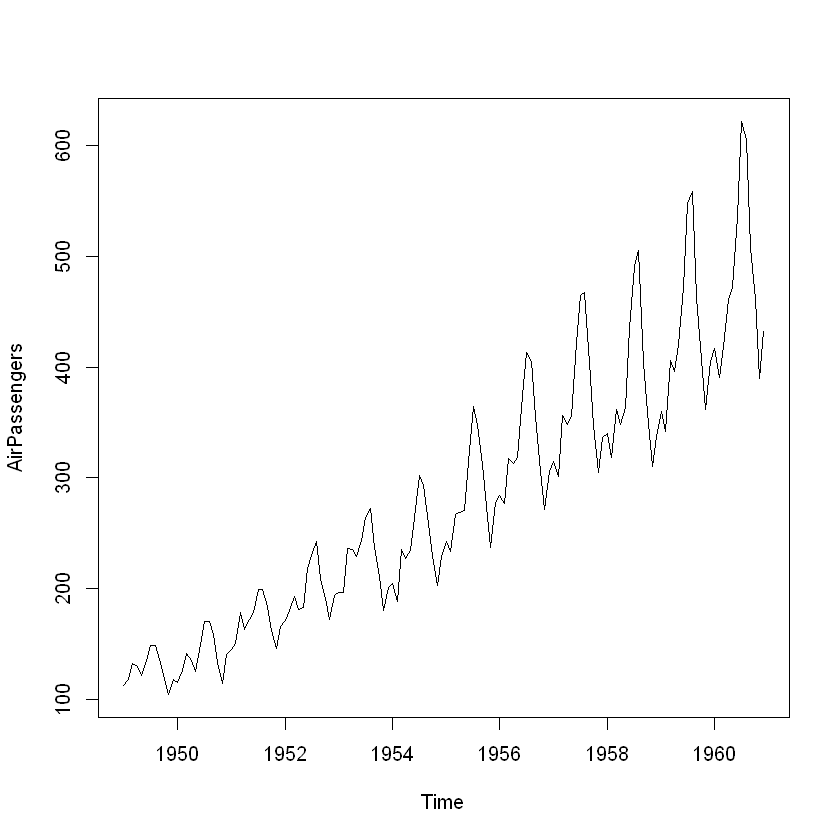

In [4]:
plot(AirPassengers)

integer(0)

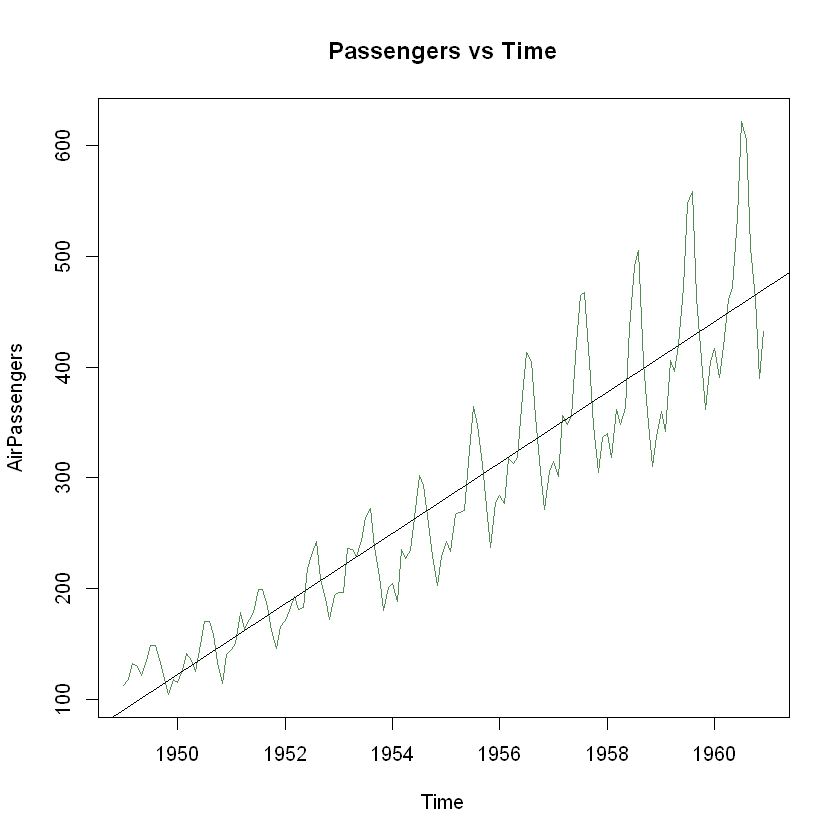

In [5]:
plot(AirPassengers, col="palegreen4", main="Passengers vs Time") + abline(lm(AirPassengers~time(AirPassengers)))

* The linear line is the mean
* As time increases, mean also increases. Hence, mean is a function of time. So this time series data is not stationary.
* Another problem is that the distance from any two peaks to the main line is not constant. Hence, variance is not equal

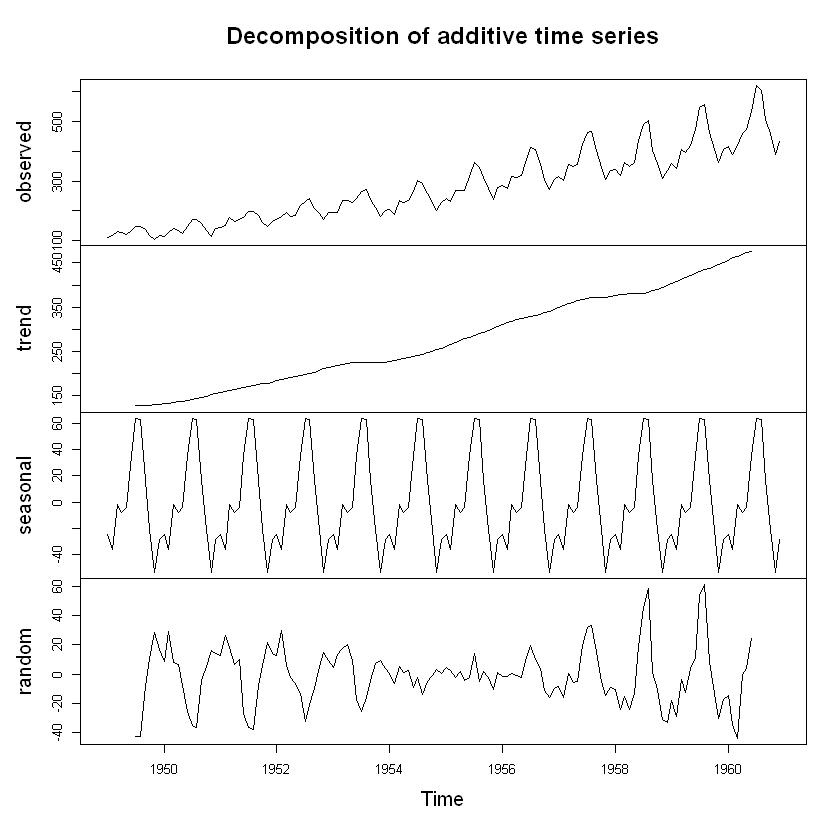

In [6]:
# Decomposition plot
plot(decompose(AirPassengers))

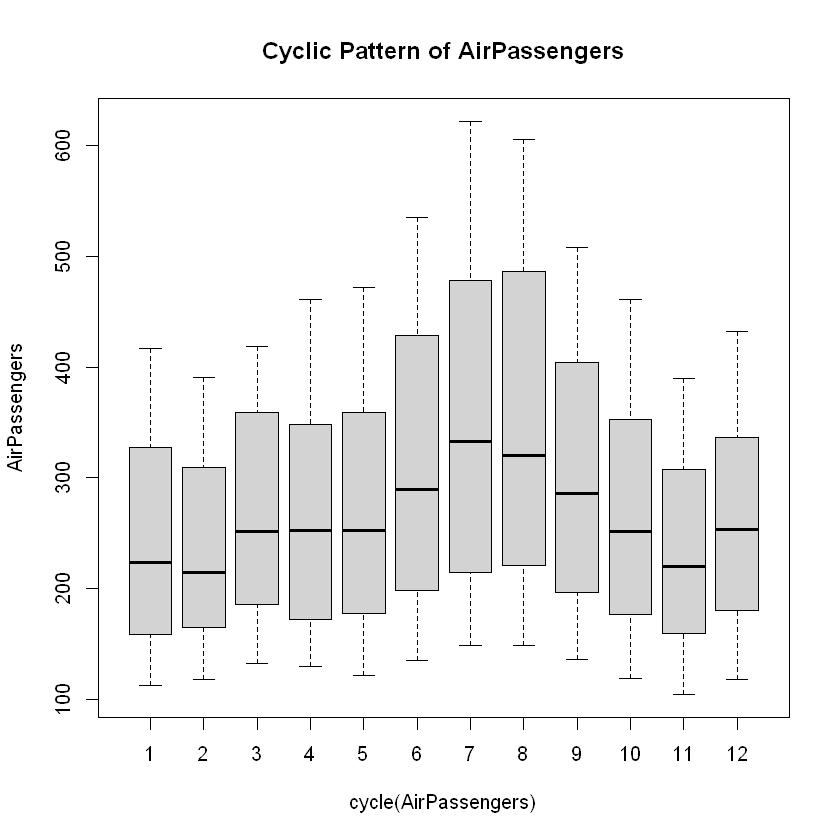

In [8]:
# Cyclic pattern plot
boxplot(AirPassengers~cycle(AirPassengers), main="Cyclic Pattern of AirPassengers")

* Most of the traffic occurs in 7th and 8th month
* Least traffic occurs in 2nd and 11th month

The data is not stationary so we need to do two things
* Make variance equal
* Make the mean constant

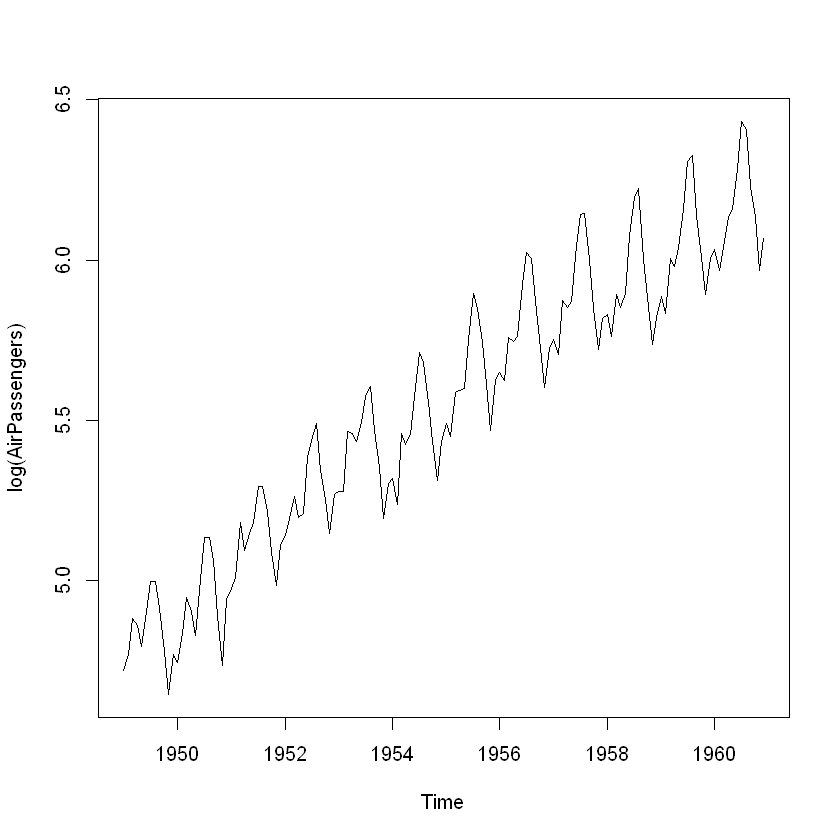

In [9]:
plot(log(AirPassengers))

integer(0)

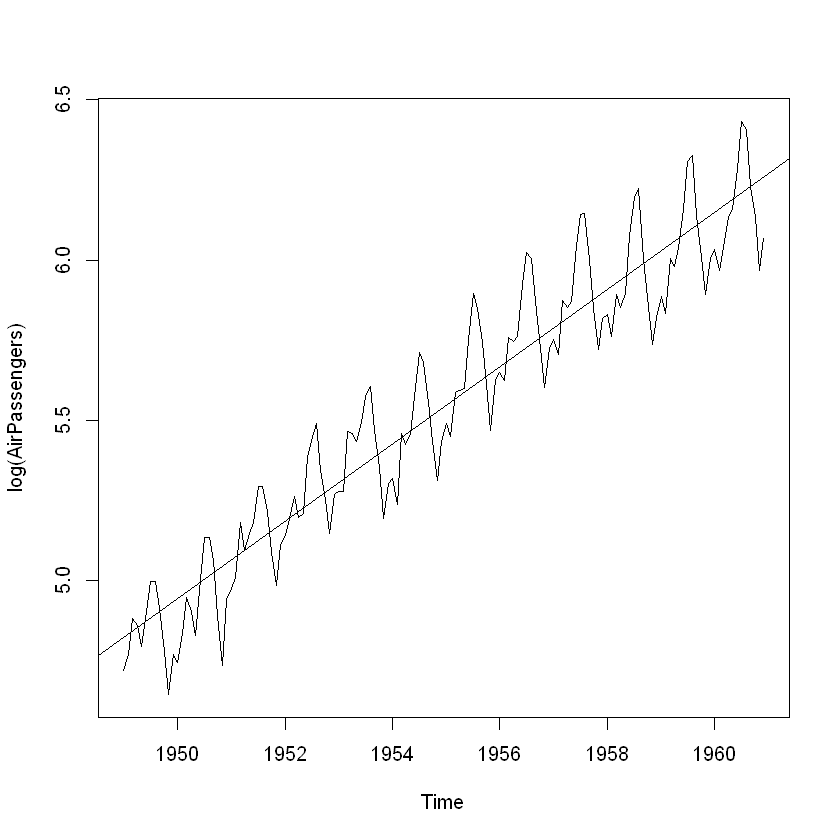

In [10]:
plot(log(AirPassengers)) + abline(lm(log(AirPassengers)~time(log(AirPassengers))))

The distance from the peak to the mean line is constant. Hence, variance is equal

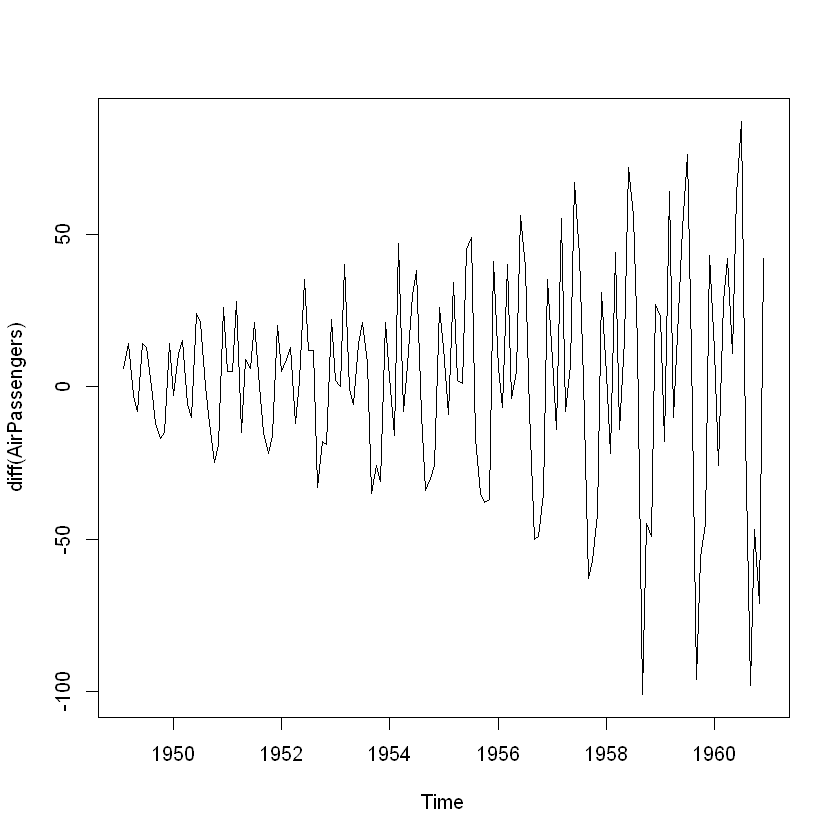

In [11]:
# Differentiation function
plot(diff(AirPassengers))

integer(0)

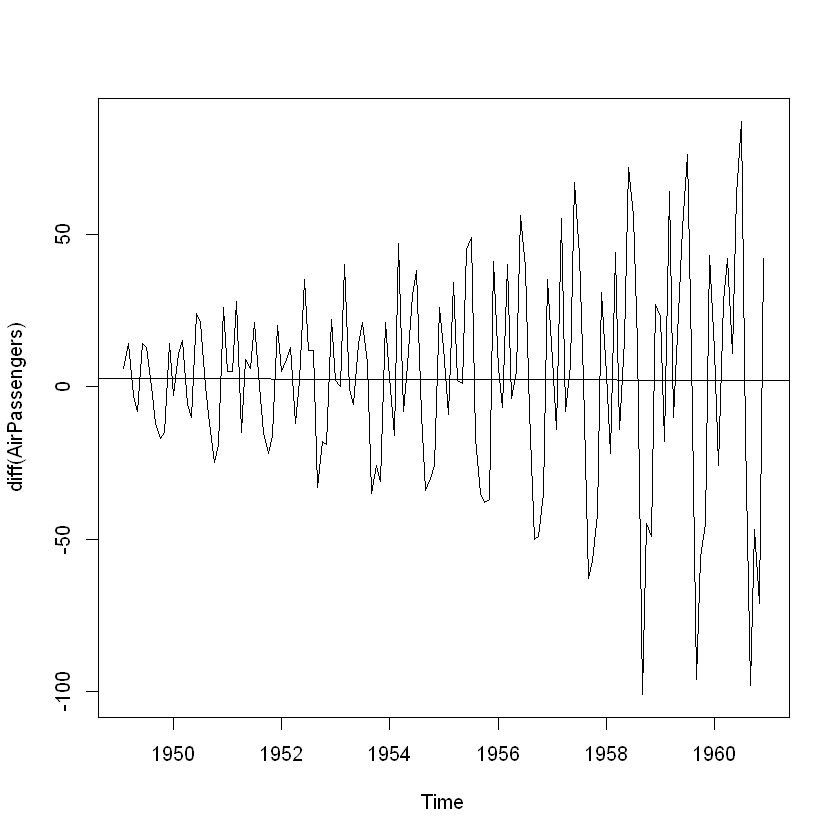

In [12]:
plot(diff(AirPassengers)) + abline(lm(diff(AirPassengers)~time(diff(AirPassengers))))

Now the mean is constant. Also the variance is equal. <br>
Hence, we have converted the data into a stationary data.

# ARIMA Model

In [13]:
# AR I MA
# p  d  q

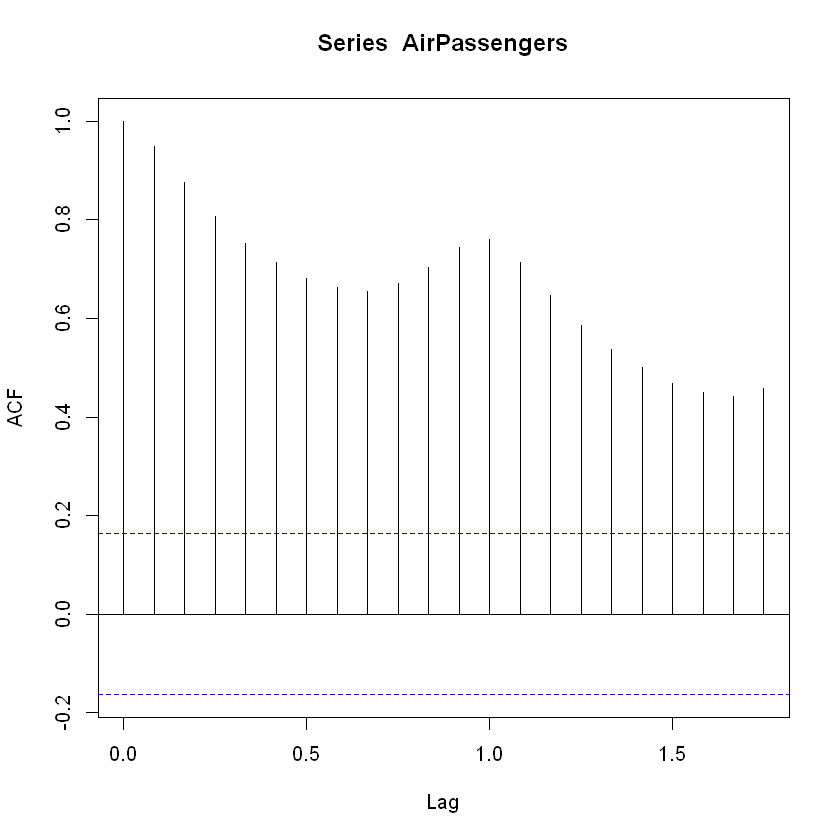

In [14]:
# acf function for q
acf(AirPassengers)

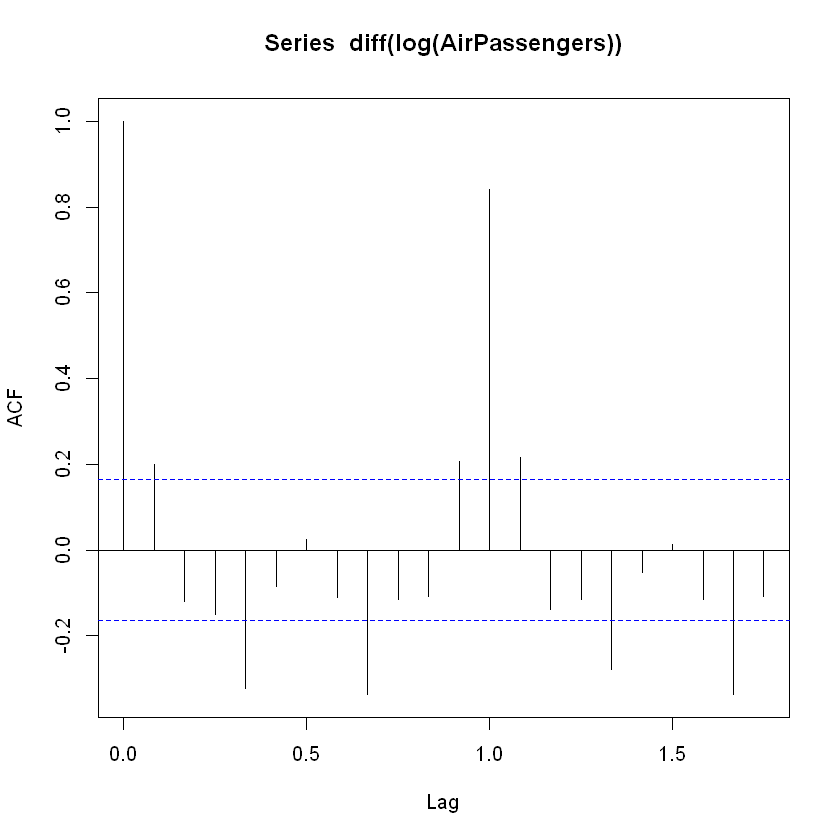

In [15]:
# Modified plot after making the data stationary
acf(diff(log(AirPassengers)))

The value of q is determined by that line which comes just before the first inverted line <br><br>
The 2nd line is the first inverted line, so the 1st line is the value of q. Hence, q=1

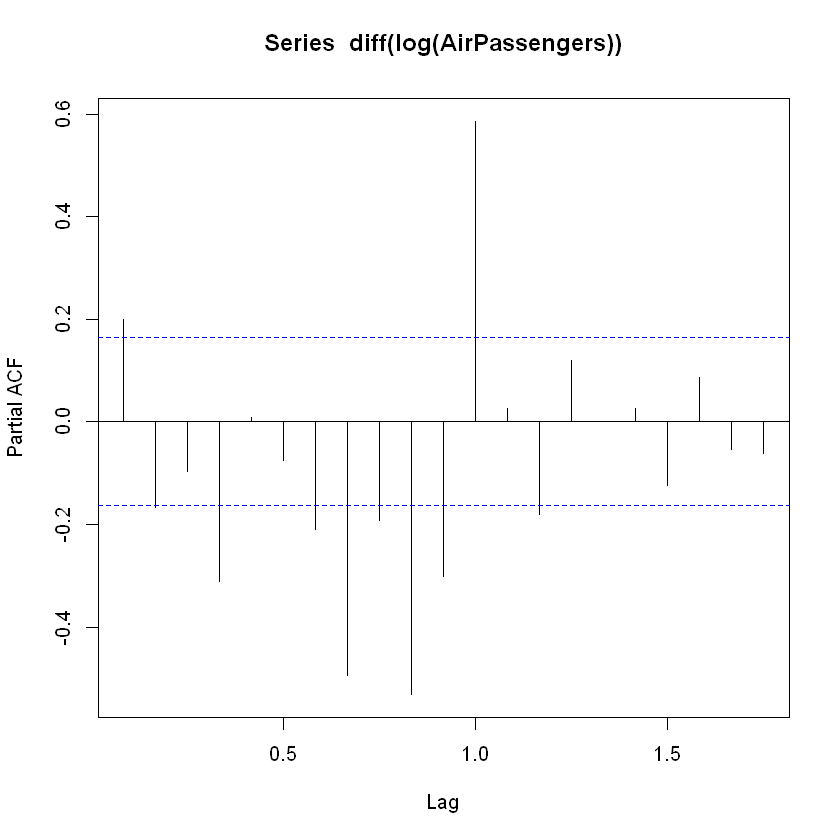

In [17]:
# pacf function for p
pacf(diff(log(AirPassengers)))

The 1st line is the first inverted line, so the 0th is the value of p. Hence, p=0

d is the no of times we differentiated the dataset to make the mean constant. Here we differentiated only 1 time, so d=1 

In [19]:
arima(log(AirPassengers), c(1,0,1), seasonal=list(order=c(0,1,0), period=12)) -> mod_time 
# No of months(variables) are 12, so period=12

In [20]:
# Predicting for the next 10 years
pred_time <- predict(mod_time, 10*12)

In [21]:
pred_time

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1961,6.103692,6.037534,6.104962,6.198798,6.220731,6.344411,6.493518,6.465931,6.288044,6.189510,6.020844,6.121744
1962,6.155667,6.088198,6.154350,6.246941,6.267660,6.390158,6.538112,6.509401,6.330418,6.230815,6.061109,6.160994
1963,6.193927,6.125494,6.190705,6.282380,6.302206,6.423833,6.570938,6.541399,6.361610,6.261221,6.090748,6.189886
1964,6.222091,6.152948,6.217468,6.308468,6.327636,6.448622,6.595102,6.564955,6.384572,6.283604,6.112567,6.211155
1965,6.242824,6.173158,6.237168,6.327672,6.346356,6.466870,6.612890,6.582294,6.401474,6.300081,6.128628,6.226811
1966,6.258085,6.188035,6.251670,6.341808,6.360136,6.480303,6.625984,6.595058,6.413917,6.312209,6.140451,6.238336
1967,6.269320,6.198987,6.262345,6.352214,6.370280,6.490191,6.635623,6.604454,6.423076,6.321138,6.149154,6.246820
1968,6.277590,6.207048,6.270204,6.359875,6.377747,6.497470,6.642719,6.611371,6.429818,6.327710,6.155561,6.253065
1969,6.283678,6.212983,6.275989,6.365514,6.383244,6.502828,6.647942,6.616463,6.434781,6.332548,6.160277,6.257663
1970,6.288159,6.217351,6.280247,6.369665,6.387290,6.506773,6.651787,6.620211,6.438435,6.336110,6.163749,6.261047


In [24]:
# These values are logarithmic. So We raise these values to the power of e
pred_time <- 2.718^pred_time$pred

In [25]:
pred_time

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1961,447.2238,418.5966,447.7922,491.8410,502.7463,568.9279,660.3996,642.4319,537.7492,487.2943,411.6691,455.3697
1962,471.0803,440.3488,470.4604,516.0962,526.8996,595.5559,690.5123,670.9708,561.0227,507.8415,428.5812,473.5962
1963,489.4512,457.0802,487.8771,534.7123,545.4179,615.9507,713.5529,692.7860,578.7962,523.5184,441.4729,487.4777
1964,503.4307,469.8016,501.1087,548.8437,559.4644,631.4087,731.0036,709.2967,592.2386,535.3671,451.2100,497.9555
1965,513.9759,479.3918,511.0776,559.4844,570.0350,643.0352,744.1216,721.7016,602.3329,544.2602,458.5147,505.8122
1966,521.8793,486.5763,518.5425,567.4489,577.9437,651.7303,753.9284,730.9715,609.8735,550.9009,463.9674,511.6748
1967,527.7749,491.9336,524.1071,573.3841,583.8355,658.2061,761.2298,737.8714,615.4845,555.8410,468.0226,516.0339
1968,532.1572,495.9150,528.2416,577.7928,588.2110,663.0141,766.6498,742.9922,619.6479,559.5058,471.0304,519.2663
1969,535.4064,498.8664,531.3059,581.0598,591.4528,666.5759,770.6642,746.7844,622.7306,562.2191,473.2569,521.6588
1970,537.8109,501.0502,533.5729,583.4765,593.8507,669.2100,773.6328,749.5883,625.0097,564.2247,474.9025,523.4270


In [28]:
# Rounding off the values
pred_time <- round(pred_time, digits=0)

In [29]:
pred_time

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1961,447,419,448,492,503,569,660,642,538,487,412,455
1962,471,440,470,516,527,596,691,671,561,508,429,474
1963,489,457,488,535,545,616,714,693,579,524,441,487
1964,503,470,501,549,559,631,731,709,592,535,451,498
1965,514,479,511,559,570,643,744,722,602,544,459,506
1966,522,487,519,567,578,652,754,731,610,551,464,512
1967,528,492,524,573,584,658,761,738,615,556,468,516
1968,532,496,528,578,588,663,767,743,620,560,471,519
1969,535,499,531,581,591,667,771,747,623,562,473,522
1970,538,501,534,583,594,669,774,750,625,564,475,523


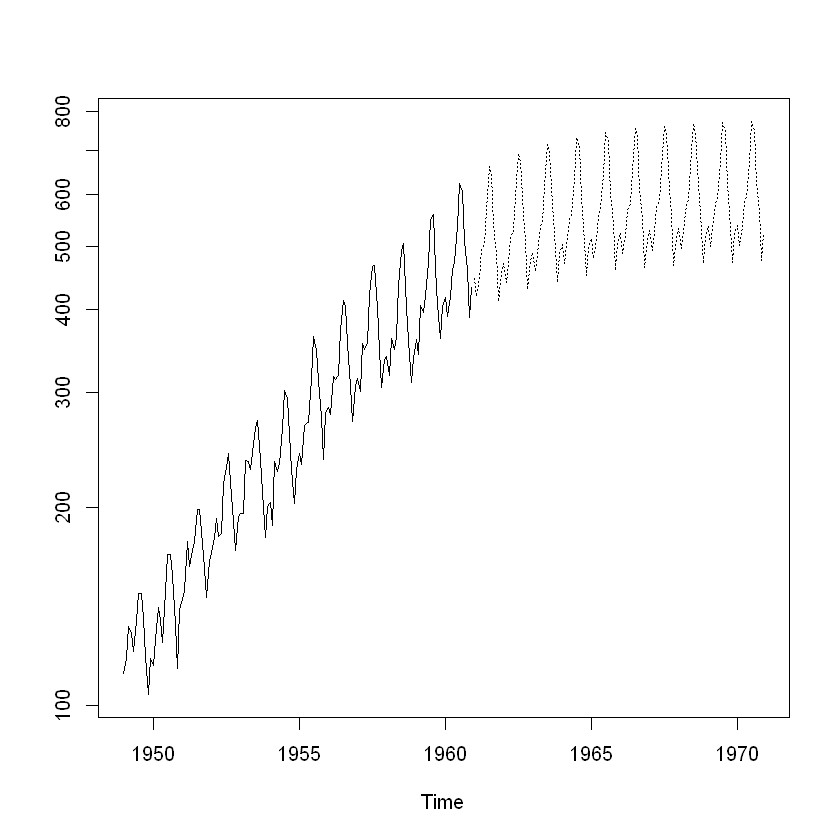

In [31]:
# Time series plot for actual vs predicted values
ts.plot(AirPassengers, pred_time, log="y", lty=c(1,3)) # lty=1 for actual values with solid line, lty=3 for predicted values with dotted lines 

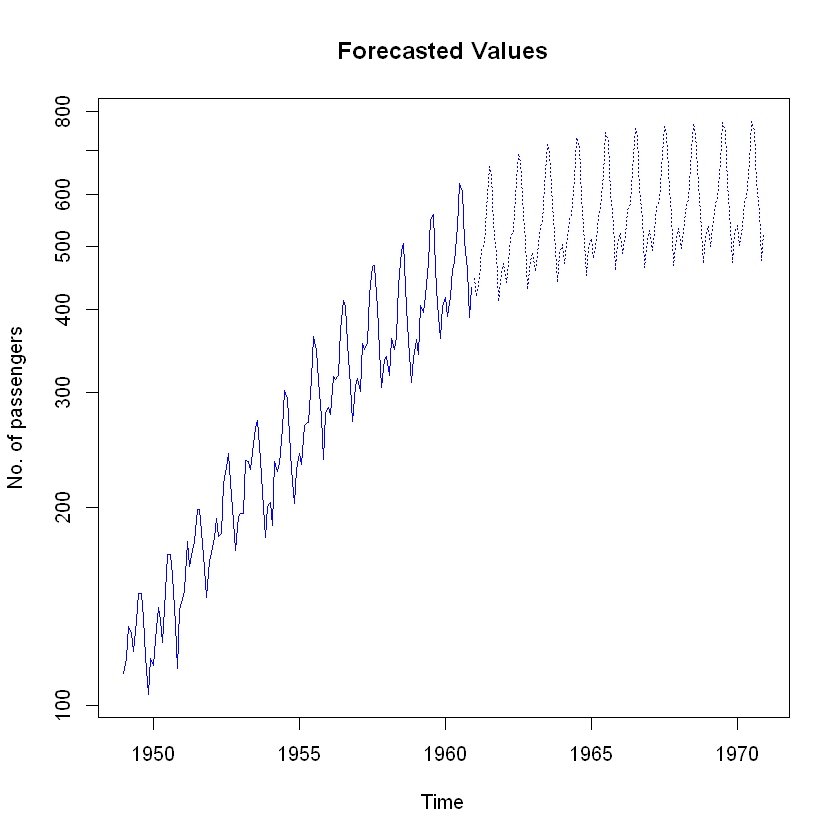

In [34]:
ts.plot(AirPassengers, pred_time, log="y", lty=c(1,3), col="blue", ylab="No. of passengers", main="Forecasted Values")